In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Lenovo\Documents\15 days project datasets\data_science_salaries.csv")
df

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium
...,...,...,...,...,...,...,...,...,...,...,...
6594,Staff Data Analyst,Entry-level,Contract,Hybrid,2020,Canada,60000,CAD,44753,Canada,Large
6595,Staff Data Analyst,Executive-level,Full-time,On-site,2020,Nigeria,15000,USD,15000,Canada,Medium
6596,Machine Learning Manager,Senior-level,Full-time,Hybrid,2020,Canada,157000,CAD,117104,Canada,Large
6597,Data Engineer,Mid-level,Full-time,Hybrid,2020,Austria,65000,EUR,74130,Austria,Large


In [5]:
df.columns

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

In [7]:
df.drop(columns = ['salary', 'salary_currency'],axis = 1,inplace = True)

-  Dropping salary and salary_currency columns simplifies the dataset while focusing on standardized salary data in US dollars for easier analysis

In [8]:
df

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,United States,Medium
...,...,...,...,...,...,...,...,...,...
6594,Staff Data Analyst,Entry-level,Contract,Hybrid,2020,Canada,44753,Canada,Large
6595,Staff Data Analyst,Executive-level,Full-time,On-site,2020,Nigeria,15000,Canada,Medium
6596,Machine Learning Manager,Senior-level,Full-time,Hybrid,2020,Canada,117104,Canada,Large
6597,Data Engineer,Mid-level,Full-time,Hybrid,2020,Austria,74130,Austria,Large


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary_in_usd       6599 non-null   int64 
 7   company_location    6599 non-null   object
 8   company_size        6599 non-null   object
dtypes: int64(2), object(7)
memory usage: 464.1+ KB


In [16]:
df.describe()

,work_year,salary_in_usd
count,6599.000000,6599.000000
mean,2022.818457,145560.558569
std,0.674809,70946.838070
min,2020.000000,15000.000000
25%,2023.000000,95000.000000
50%,2023.000000,138666.000000
75%,2023.000000,185000.000000
max,2024.000000,750000.000000


- The dataset contains salary information spanning from 2020 to 2024. 
- On average salaries are around  145560 USD. 
- The range of salaries varies widely from 15000 to  750000 USD 
- Most salaries fall between  95000  and  185000 USD

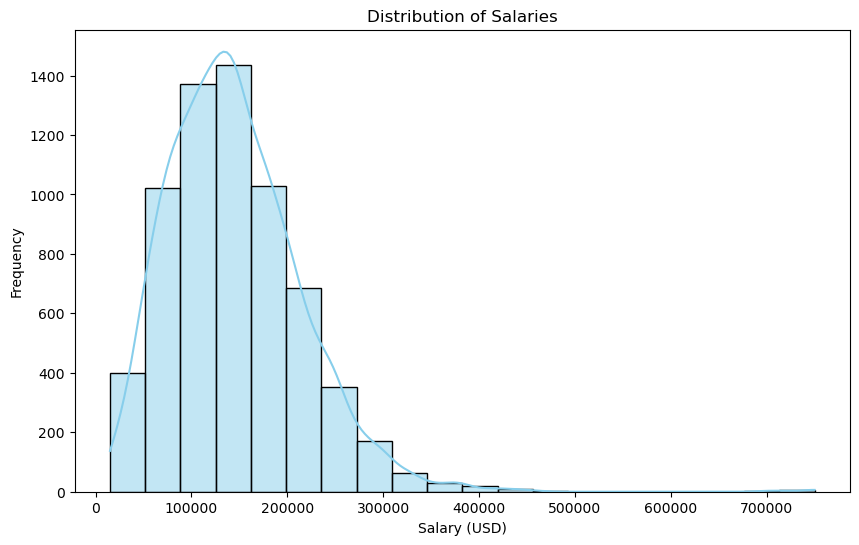

In [92]:
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Salaries')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

- Most data scientists earn salaries between 0 and 200,000.
- The peak frequency occurs around 100,000.
- Fewer data scientists earn salaries exceeding 200,000.

In [17]:
df['work_year'].unique()

array([2024, 2023, 2022, 2021, 2020], dtype=int64)

In [18]:
df.groupby('work_year')['salary_in_usd'].mean()

work_year
2020    102250.866667
2021     99501.287037
2022    131788.543165
2023    150791.420757
2024    153124.084063
Name: salary_in_usd, dtype: float64

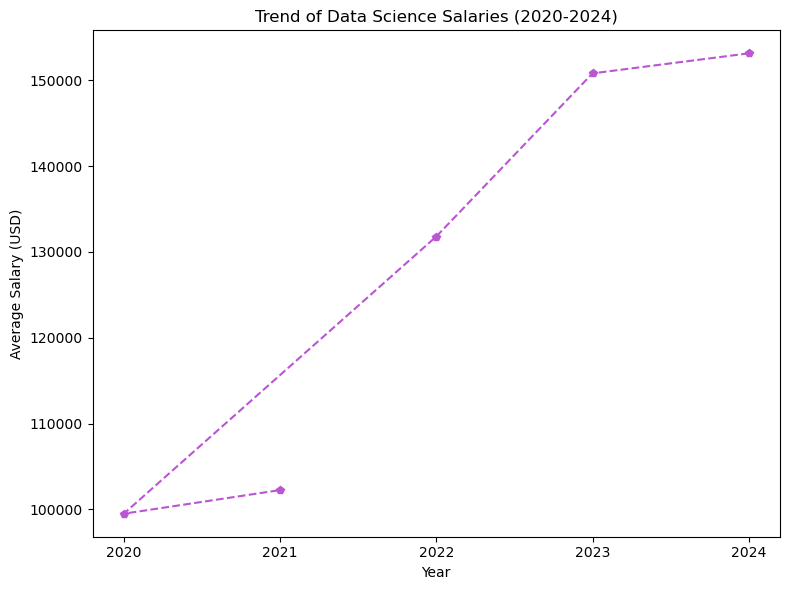

In [108]:
years = [2024, 2023, 2022, 2020, 2021]
average_salaries_per_year = [153124.084063, 150791.420757, 131788.543165, 99501.287037,102250.866667]
plt.figure(figsize=(8, 6))
plt.plot(years, average_salaries_per_year, marker='p', color='mediumorchid', linestyle='--')
plt.title('Trend of Data Science Salaries (2020-2024)')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.xticks(years)
plt.tight_layout()

- The average salary for data scientists has consistently risen over the years

In [56]:
top_average_salary_country = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending = False).head(50)

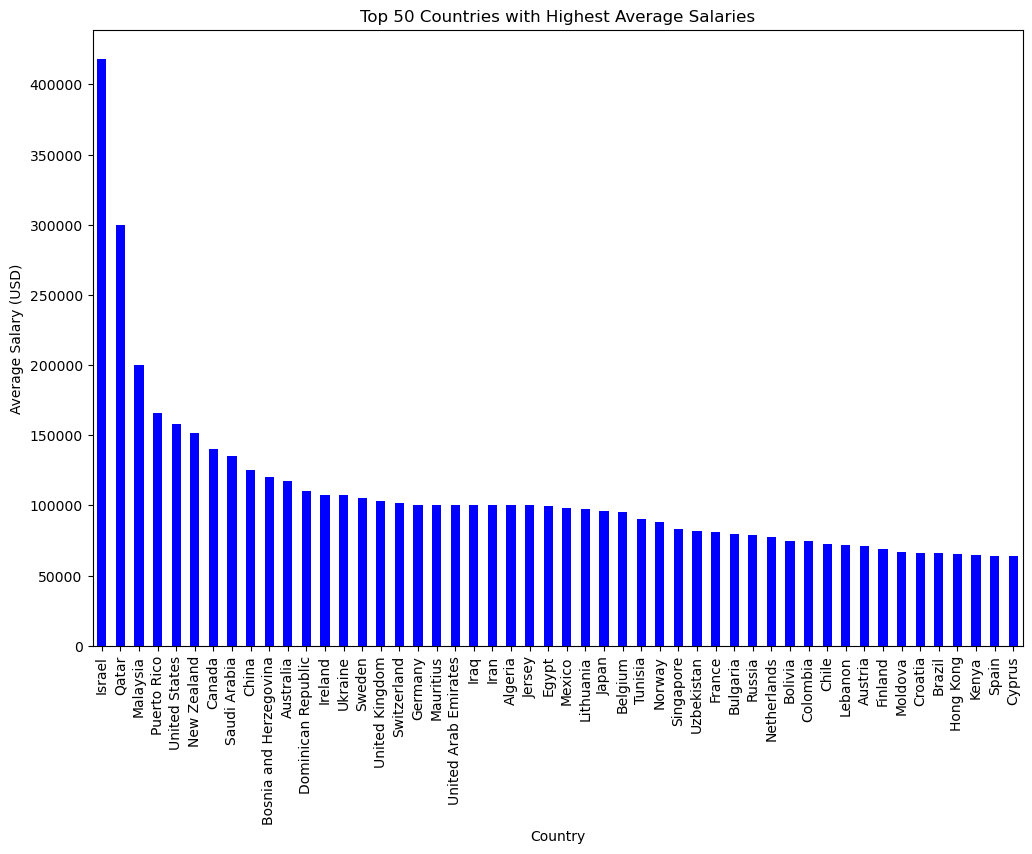

In [60]:
plt.figure(figsize=(12, 8))
top_average_salary_country.plot(kind='bar', color='blue')
plt.title('Top 50 Countries with Highest Average Salaries')
plt.xlabel('Country')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=90)
plt.show()

- Data scientists in the israel. earn the most, way ahead of other countries.
- Qatar,Malaysia,Puerto Rico: These countries also offer competitive salaries.

In [84]:
average_salary_experience = df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending = False)
average_salary_experience

experience_level
Executive-level    189687.346457
Senior-level       162071.063581
Mid-level          119019.812537
Entry-level         84448.916814
Name: salary_in_usd, dtype: float64

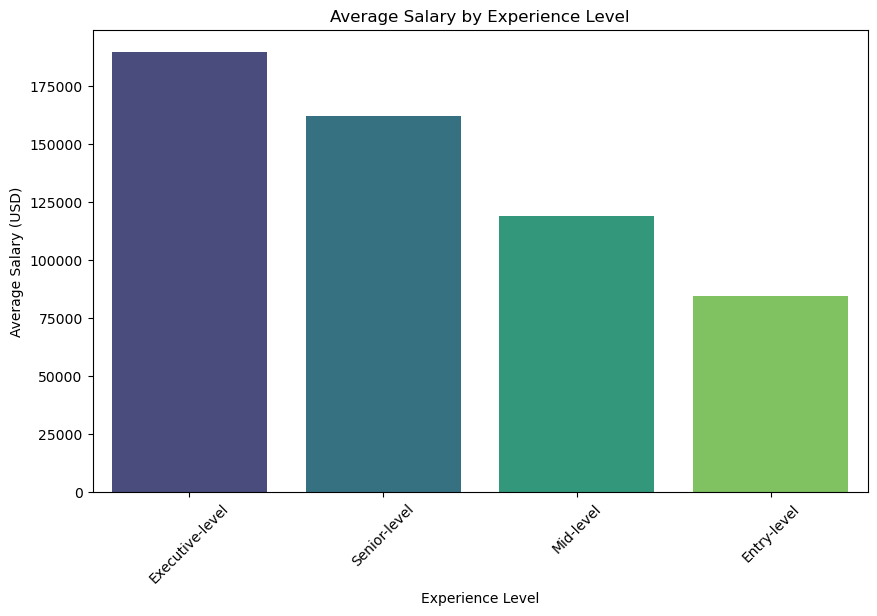

In [88]:
plt.figure(figsize=(10, 6))
sns.barplot(x=average_salary_experience.index, y=average_salary_experience.values, palette='viridis')
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.show()


- Experience directly impacts data science salaries, with higher levels correlating to better compensation

In [86]:
average_salary_by_employment_type = df.groupby('employment_type')['salary_in_usd'].mean().sort_values(ascending=False)
average_salary_by_employment_type

employment_type
Full-time    146034.998932
Contract     117109.368421
Part-time     55291.062500
Freelance     51923.166667
Name: salary_in_usd, dtype: float64

Text(0.5, 1.0, 'Average Salary by Employment Type')

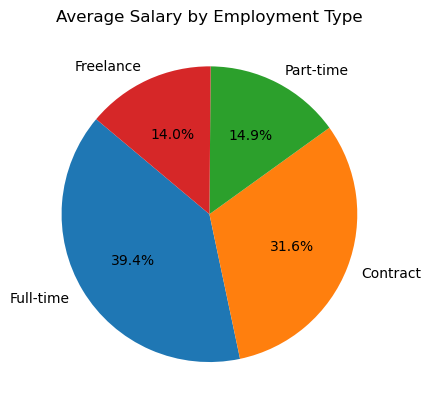

In [82]:
plt.pie(average_salary_by_employment_type.values, labels=average_salary_by_employment_type.index, autopct='%1.1f%%', startangle=140)
plt.title('Average Salary by Employment Type')

-  employment type significantly impacts data science salaries, with full-time positions offering the highest compensation

In [87]:
average_salary_by_company_size = df.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False)
average_salary_by_company_size

company_size
Medium    149659.386689
Large     120638.404218
Small      87687.458824
Name: salary_in_usd, dtype: float64

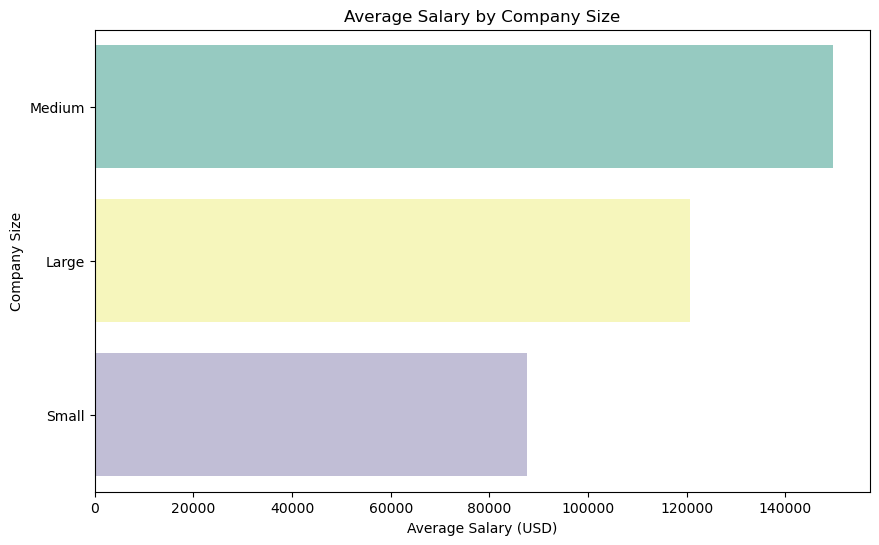

In [91]:
plt.figure(figsize=(10, 6))
sns.barplot(x=average_salary_by_company_size.values, y=average_salary_by_company_size.index, palette='Set3')
plt.title('Average Salary by Company Size')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Company Size')
plt.show()


 - Medium-sized companies offer the highest average salary.
 - Large companies follow with a slightly lower average salary.
 - Small companies provide the lowest average salary.

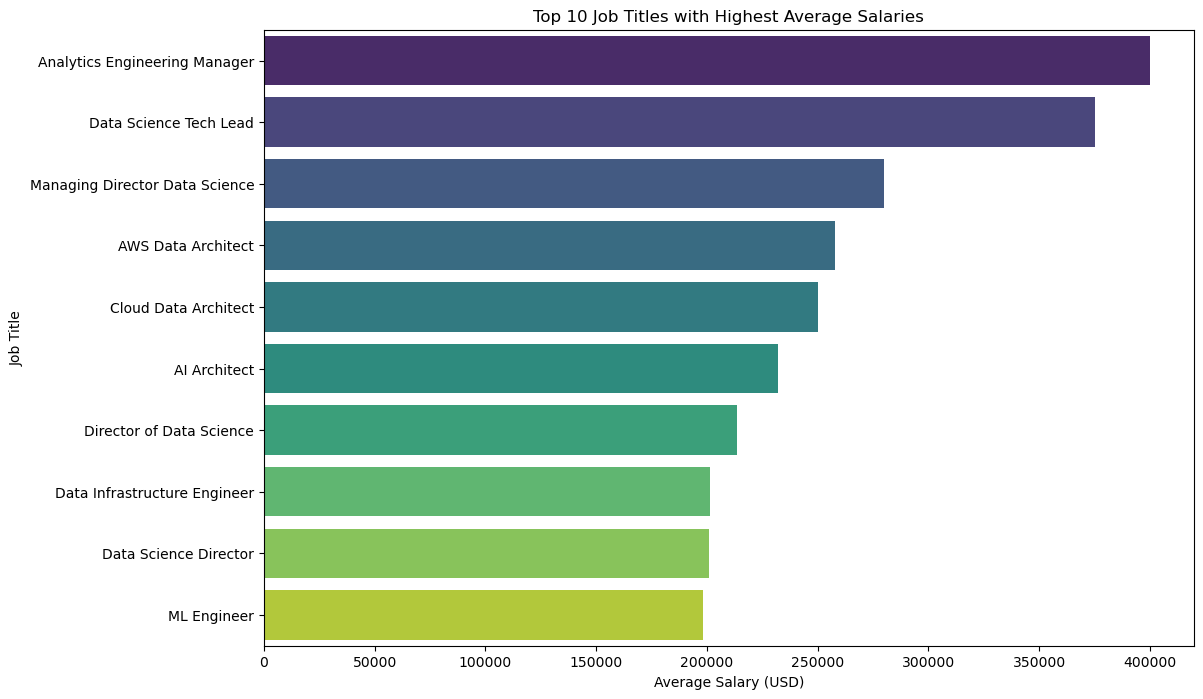

In [103]:
avg_salary_by_jobtitle = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_salary_by_jobtitle.values, y=avg_salary_by_jobtitle.index, palette='viridis')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.title('Top 10 Job Titles with Highest Average Salaries')
plt.show()


- The Analytics Engineering Manager earns the highest average salary, topping 350000
-  Data Science Tech Lead and Managing Director Data Science also command significant average salaries
-  Other roles like AWS Data Architect, Cloud Data Architect, and AI Architect offer competitive pay as well